<a href="https://colab.research.google.com/github/pmontecinos23/Spanish-Wine-Evaluation/blob/main/Spanish_Wine_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine Ratings or Stroke Predictions
Author: Paul Montecinos


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Imports below are temporary. I will filter through and clean it up once my data set is selected

In [18]:
## Pandas
import pandas as pd
## Numpy
import numpy as np
# MatPlotLib
import matplotlib.pyplot as plt
## seaborn
import seaborn as sns

## Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

## Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier

## Regression Metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## Set global scikit-learn configuration 
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

## Loading Wine Data

### Data Source: 
https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset?resource=download

In [6]:
wine = pd.read_csv('/content/drive/MyDrive/Stack 2 Machine Learning/03 Week 3: Classification Models/Project 2/wines_SPA.csv')
wine.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


Brief Description: with 7500 different wines we can use this data to determining ratings and popularity of spanish wines

Target: Rating

Row represent: Wines

Classification or Regression: As an avid wine drinker, I would do a classification model determining the highest rated wines.

Features: There are 11 features in this dataset

In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [8]:
# How many rows
print(f'Number of rows:{len(wine.axes[0])}')

Number of rows:7500


Challenges: 
* Total missing fields is 2885. Most of them are in the body and acidity type - determining what data I will fill into missing rows
* There are lot of objects in this data to potentially convert - Potentially cause overfitting - determining which features to drop


In [9]:
wine.shape
print(f'There are {wine.shape[0]} rows, and {wine.shape[1]} columns.')
print(f'The rows represent {wine.shape[0]} observations, and the columns represent {wine.shape[1]-1} features and 1 target variable.')

There are 7500 rows, and 11 columns.
The rows represent 7500 observations, and the columns represent 10 features and 1 target variable.


## Data Cleaning

In [14]:
## make columns lowercase for ease of reference and display names
wine.columns = wine.columns.str.lower()
wine.columns

Index(['winery', 'wine', 'year', 'rating', 'num_reviews', 'country', 'region',
       'price', 'type', 'body', 'acidity'],
      dtype='object')

### Checking for Duplicates

In [12]:
# checking for duplicates
wine.duplicated().sum()

5452

### Removing Duplicates

In [13]:
wine = wine.drop_duplicates()
wine.duplicated().sum()

0

### Checking for categorical errors

In [15]:
# Inspect categorical columns for errors
cat_cols = make_column_selector(dtype_include='object')(wine)
for col in cat_cols:
  display(wine[col].value_counts(normalize=True))

Vega Sicilia                            0.047363
Alvaro Palacios                         0.023438
Artadi                                  0.020996
La Rioja Alta                           0.017578
Marques de Murrieta                     0.016113
                                          ...   
Valdelosfrailes                         0.000488
Briego                                  0.000488
Guillem Carol - Cellers Carol Valles    0.000488
Particular                              0.000488
Binigrau                                0.000488
Name: winery, Length: 480, dtype: float64

Tinto                                                 0.027344
Unico                                                 0.020020
Valbuena 5o                                           0.015625
Reserva                                               0.015137
Priorat                                               0.012695
                                                        ...   
San Valentin Parellada                                0.000488
Silvanus Edicion Limitada Ribera del Duero            0.000488
El Jardin de las Iguales Vinedo Historico Garnacha    0.000488
Garnacha Vinas Centenarias                            0.000488
Capricho Crianza                                      0.000488
Name: wine, Length: 847, dtype: float64

2016    0.118768
2017    0.117302
2015    0.100684
2018    0.095797
2014    0.077224
          ...   
1953    0.000489
1972    0.000489
1974    0.000489
1931    0.000489
1925    0.000489
Name: year, Length: 71, dtype: float64

Espana    1.0
Name: country, dtype: float64

Ribera del Duero                   0.264160
Rioja                              0.233887
Priorato                           0.122070
Toro                               0.040039
Castilla y Leon                    0.024902
                                     ...   
Ribera del Gallego-Cinco Villas    0.000488
Monterrei                          0.000488
Jerez Cream                        0.000488
Condado de Huelva                  0.000488
Abona                              0.000488
Name: region, Length: 76, dtype: float64

Ribera Del Duero Red    0.275489
Rioja Red               0.232235
Priorat Red             0.122554
Red                     0.108136
Toro Red                0.040165
Tempranillo             0.037590
Sherry                  0.028836
Rioja White             0.019053
Pedro Ximenez           0.018023
Grenache                0.018023
Albarino                0.017508
Cava                    0.016993
Verdejo                 0.013903
Monastrell              0.009269
Mencia                  0.008754
Montsant Red            0.008754
Syrah                   0.007724
Chardonnay              0.006694
Cabernet Sauvignon      0.005664
Sparkling               0.002575
Sauvignon Blanc         0.002060
Name: type, dtype: float64

### Checking for missing values

In [21]:
wine.isna().sum()

winery           0
wine             0
year             2
rating           0
num_reviews      0
country          0
region           0
price            0
type           106
body           271
acidity        271
dtype: int64

Will possibly remove year as well as the country column.

Will address the rest of the missing values during preprocessing

## Visuals

### Heatmap


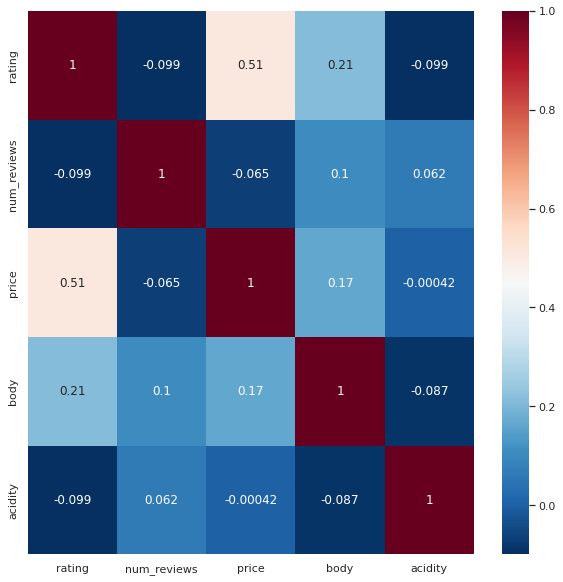

In [19]:
corr = wine.corr()
sns.set(font_scale=1)
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap = 'RdBu_r', annot = True);

Using the heatmap above you can see there is a moderate correlation between the price and the rating.

### Boxplot

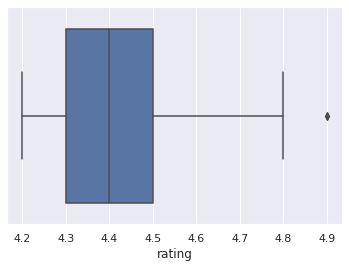

In [23]:
sns.boxplot(data=wine, x='rating');

The boxplot above shows the average rating is 4.4 and the biggest outlier is 4.9.

## Preprocessing

## Models